<a href="https://colab.research.google.com/github/abhishekmukne/Forecasting-Future-Water-Requirements-and-Acceessing-Water-Capacities-in-Dam/blob/main/MajorFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# ---------- 1. READ JAYAKWADI RESERVOIR (EXCEL) ----------
res = pd.read_excel("jayakwadi_storage.xlsx", skiprows=5)
print("Jayakwadi columns:", res.columns.tolist())

# Parse date and keep Date + FRL
res["Date"] = pd.to_datetime(res["Date"])
res_clean = res[["Date", "FRL"]].rename(columns={"FRL": "Water_Level_m"})

# ---------- 2. READ NASA POWER CSV ----------
nasa = pd.read_csv("nasa_power.csv", skiprows=15)

# Clean column names (remove spaces at start/end)
nasa.columns = nasa.columns.str.strip()
print("NASA columns after strip:", nasa.columns.tolist())

# Rename to standard names
nasa = nasa.rename(columns={
    "Temperature": "Temperature_C",        # after strip it's 'Temperature'
    "Relative Humidity": "Humidity_%",
    "Rainfall": "Rainfall_mm"
})

# ---------- 3. CREATE PROPER DATE FROM YEAR + DOY ----------
nasa["Date"] = pd.to_datetime(dict(
    year=nasa["YEAR"],
    month=1,
    day=1
)) + pd.to_timedelta(nasa["DOY"] - 1, unit="D")

# Keep only needed climate columns
clim_clean = nasa[["Date", "Rainfall_mm", "Temperature_C", "Humidity_%"]]

# ---------- 4. MERGE RESERVOIR + CLIMATE ON DATE ----------
merged = pd.merge(
    res_clean,
    clim_clean,
    on="Date",
    how="inner"
).sort_values("Date")

# ---------- 5. ADD DAM NAME + INFLOW/OUTFLOW ----------
merged["Dam_Name"] = "Jayakwadi"
merged["Inflow_m3s"] = 0.0
merged["Outflow_m3s"] = 0.0

# ---------- 6. REORDER COLUMNS TO MATCH TUNGABHADRA ----------
final_cols = [
    "Date",
    "Dam_Name",
    "Rainfall_mm",
    "Temperature_C",
    "Humidity_%",
    "Inflow_m3s",
    "Outflow_m3s",
    "Water_Level_m"
]

final_df = merged[final_cols]

# ---------- 7. SAVE & DOWNLOAD ----------
output_name = "jayakwadi_model_input.csv"
final_df.to_csv(output_name, index=False)

files.download(output_name)
print("Done! Rows in final file:", len(final_df))

Jayakwadi columns: ['Basin', 'Sub-basin', 'Reservoir Name', 'Agency Name', 'Date', 'FRL', 'Live Cap FRL', 'Current Live Storage']
NASA columns after strip: ['YEAR', 'DOY', 'Temperature', 'T2M_RANGE', 'Relative Humidity', 'Rainfall']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Done! Rows in final file: 8905


In [ ]:
from google.colab import files
files.upload()


Saving jayakwadi_model_input.csv to jayakwadi_model_input.csv


{'jayakwadi_model_input.csv': b'Date,Dam_Name,Rainfall_mm,Temperature_C,Humidity_%,Inflow_m3s,Outflow_m3s,Water_Level_m\n2000-01-01,Jayakwadi,0.0,20.49,31.87,0.0,0.0,463.91\n2000-01-02,Jayakwadi,0.0,20.13,30.87,0.0,0.0,463.91\n2000-01-03,Jayakwadi,0.0,20.25,29.09,0.0,0.0,463.91\n2000-01-04,Jayakwadi,0.0,20.12,26.24,0.0,0.0,463.91\n2000-01-05,Jayakwadi,0.0,19.46,25.17,0.0,0.0,463.91\n2000-01-06,Jayakwadi,0.0,19.36,22.11,0.0,0.0,463.91\n2000-01-07,Jayakwadi,0.0,18.79,21.78,0.0,0.0,463.91\n2000-01-08,Jayakwadi,0.0,19.7,20.18,0.0,0.0,463.91\n2000-01-09,Jayakwadi,0.0,21.21,19.12,0.0,0.0,463.91\n2000-01-10,Jayakwadi,0.0,22.43,20.57,0.0,0.0,463.91\n2000-01-11,Jayakwadi,0.0,23.23,26.86,0.0,0.0,463.91\n2000-01-12,Jayakwadi,0.0,23.63,33.12,0.0,0.0,463.91\n2000-01-13,Jayakwadi,0.0,23.62,34.83,0.0,0.0,463.91\n2000-01-14,Jayakwadi,0.0,23.22,34.0,0.0,0.0,463.91\n2000-01-15,Jayakwadi,0.0,22.45,19.38,0.0,0.0,463.91\n2000-01-16,Jayakwadi,0.0,22.42,23.46,0.0,0.0,463.91\n2000-01-17,Jayakwadi,0.0,24.77,37

In [ ]:
from google.colab import files
files.upload()

Saving jayakwadi_storage.xlsx to jayakwadi_storage.xlsx


{'jayakwadi_storage.xlsx': b'PK\x03\x04\n\x00\x00\x00\x08\x00\x19FK[=s$\x8bl\x01\x00\x00\x9a\x05\x00\x00\x13\x00\x00\x00[Content_Types].xml\xadT\xc9n\xc20\x10\xbd\xf7+"_Qb\xe8\xa1\xaa*\x02\x87\xd2\x1e[\xa4\xd2\x0fp\xe3Ib\xe1M\x1e\xb3\xfd}\'aQ\x85\x80\xa8\n\x978\xf6\xbc\xcd\x93\xd8\xe3\xe9\xd6\xe8d\r\x01\x95\xb39\x1beC\x96\x80-\x9cT\xb6\xca\xd9\xf7\xe2=}f\tFa\xa5\xd0\xceB\xcev\x80l:y\x18/v\x1e0!\xb2\xc5\x9c\xd51\xfa\x17\xce\xb1\xa8\xc1\x08\xcc\x9c\x07K\x95\xd2\x05#"MC\xc5\xbd(\x96\xa2\x02\xfe8\x1c>\xf1\xc2\xd9\x086\xa6\xb1\xd1`\x93\xf1\x0cJ\xb1\xd21y\xdb\xd2\xf2>\x88\xb7\x15K^\xf7\xb8\xc6*g\xca4\xfcf\x9d_d\x04\xd0xF\x11\xdekU\x88Hu\xbe\xb6\xf2,Wz\xc8\x94\x11\xb3\xc5`\xad<\x0e\x08p\xc5\xa1\xa9\\78\xf0>\xa9\x97AIH\xe6"\xc4\x0fa\x08\xc5\xb7\x9ao\\X\xfe8\xb7\xccn\x8b\\H\xe9\xcaR\x15 ]\xb12D\xc9\xd0\x07\x10\x12k\x80ht\xd6\x8e\x99\x11\xca\x0e\xba\xfd[0\xf2v\x18\xdd9\xc8I\xbf#G\xa4?\x04\xf6\xcf\xfe\x11Z\x99\x0eC\x8c;\rx\xef\xb6\xb7\xa2]\xce\xb5\x08 \xbfb\xa0\xa3t\xf7\x00\x7f\xb5;r\xc8 6\r\xec\

In [ ]:
import pandas as pd

res = pd.read_excel("jayakwadi_storage.xlsx", skiprows=5)

print("FRL stats:")
print(res["FRL"].describe())

print("\nCurrent Live Storage stats:")
print(res["Current Live Storage"].describe())


FRL stats:
count    8.905000e+03
mean     4.639100e+02
std      5.474329e-11
min      4.639100e+02
25%      4.639100e+02
50%      4.639100e+02
75%      4.639100e+02
max      4.639100e+02
Name: FRL, dtype: float64

Current Live Storage stats:
count    8658.000000
mean        0.874007
std         0.698795
min         0.000000
25%         0.247188
50%         0.732240
75%         1.414980
max         2.171000
Name: Current Live Storage, dtype: float64


In [ ]:
from google.colab import files
files.upload()

Saving nasa_power.csv to nasa_power.csv


{'nasa_power.csv': b'-BEGIN HEADER-,,,,,\r\nNASA/POWER Source Native Resolution Daily Data ,,,,,\r\nDates (month/day/year): 01/01/2000 through 12/31/2024 in LST,,,,,\r\nLocation: latitude  19.47   longitude 75.33 ,,,,,\r\nelevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 511.02 meters,,,,,\r\nThe value for missing source data that cannot be computed or is outside of the sources availability range: -999 ,,,,,\r\nparameter(s): ,,,,,\r\nT2M               MERRA-2 Temperature at 2 Meters (C) ,,,,,\r\nT2M_RANGE         MERRA-2 Temperature at 2 Meters Range (C) ,,,,,\r\nRH2M              MERRA-2 Relative Humidity at 2 Meters (%) ,,,,,\r\nPRECTOTCORR       MERRA-2 Precipitation Corrected (mm/day) ,,,,,\r\nIMERG_PRECTOT     MERRA-2 Total Precipitation (mm/day) ,,,,,\r\nMessage(s): ,,,,,\r\nThe IMERG Source Data is not available at the Local Solar Time (LST) standard. ,,,,,\r\n-END HEADER-,,,,,\r\nYEAR,DOY,Temperature ,T2M_RANGE,Relative Humidity,Rainfall\r\n2000,1,20.49,18

In [ ]:
import pandas as pd
from google.colab import files

# --- 1. Read Jayakwadi Excel ---
res = pd.read_excel("jayakwadi_storage.xlsx", skiprows=5)
res["Date"] = pd.to_datetime(res["Date"])

# Use Current Live Storage instead of FRL
# (assuming it's in TMC or some storage unit)
res_clean = res[["Date", "Current Live Storage"]].rename(columns={
    "Current Live Storage": "Water_Level_m"   # reusing the column name for your code
})

# --- 2. Read NASA climate CSV ---
nasa = pd.read_csv("nasa_power.csv", skiprows=15)
nasa.columns = nasa.columns.str.strip()

nasa = nasa.rename(columns={
    "Temperature": "Temperature_C",
    "Relative Humidity": "Humidity_%",
    "Rainfall": "Rainfall_mm"
})

nasa["Date"] = pd.to_datetime(dict(
    year=nasa["YEAR"],
    month=1,
    day=1
)) + pd.to_timedelta(nasa["DOY"] - 1, unit="D")

clim_clean = nasa[["Date", "Rainfall_mm", "Temperature_C", "Humidity_%"]]

# --- 3. Merge ---
merged = pd.merge(
    res_clean,
    clim_clean,
    on="Date",
    how="inner"
).sort_values("Date")

# --- 4. Add Dam_Name and dummy inflow/outflow (even if we don't use them as features) ---
merged["Dam_Name"] = "Jayakwadi"
merged["Inflow_m3s"] = 0.0
merged["Outflow_m3s"] = 0.0

# --- 5. Reorder columns to match Tungabhadra ---
final_cols = [
    "Date",
    "Dam_Name",
    "Rainfall_mm",
    "Temperature_C",
    "Humidity_%",
    "Inflow_m3s",
    "Outflow_m3s",
    "Water_Level_m"
]

final_df = merged[final_cols]

# --- 6. Save + download ---
output_name = "jayakwadi_model_input.csv"
final_df.to_csv(output_name, index=False)

files.download(output_name)
print("Done! Rows:", len(final_df))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Done! Rows: 8905


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 256)        │       135,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,358 (1.25 MB)

 Trainable params: 327,358 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.06746, saving model to jayakwadi_bilstm_30day.keras
215/215 - 34s - 160ms/step - loss: 0.0807 - mae: 0.2336 - val_loss: 0.0675 - val_mae: 0.2155
Epoch 2/50

Epoch 2: val_loss did not improve from 0.06746
215/215 - 25s - 117ms/step - loss: 0.0630 - mae: 0.2140 - val_loss: 0.0737 - val_mae: 0.2229
Epoch 3/50

Epoch 3: val_loss did not improve from 0.06746
215/215 - 25s - 117ms/step - loss: 0.0605 - mae: 0.2105 - val_loss: 0.0909 - val_mae: 0.2637
Epoch 4/50

Epoch 4: val_loss did not improve from 0.06746
215/215 - 26s - 121ms/step - loss: 0.0593 - mae: 0.2084 - val_loss: 0.0890 - val_mae: 0.2605
Epoch 5/50

Epoch 5: val_loss did not improve from 0.06746
215/215 - 40s - 186ms/step - loss: 0.0593 - mae: 0.2087 - val_loss: 0.0975 - val_mae: 0.2756
Epoch 6/50

Epoch 6: val_loss did not improve from 0.06746
215/215 - 26s - 122ms/step - loss: 0.0585 - mae: 0.2071 - val_loss: 0.0777 - val_mae: 0.2436
Epoch 7/50

Epoch 7: val_loss did not impr

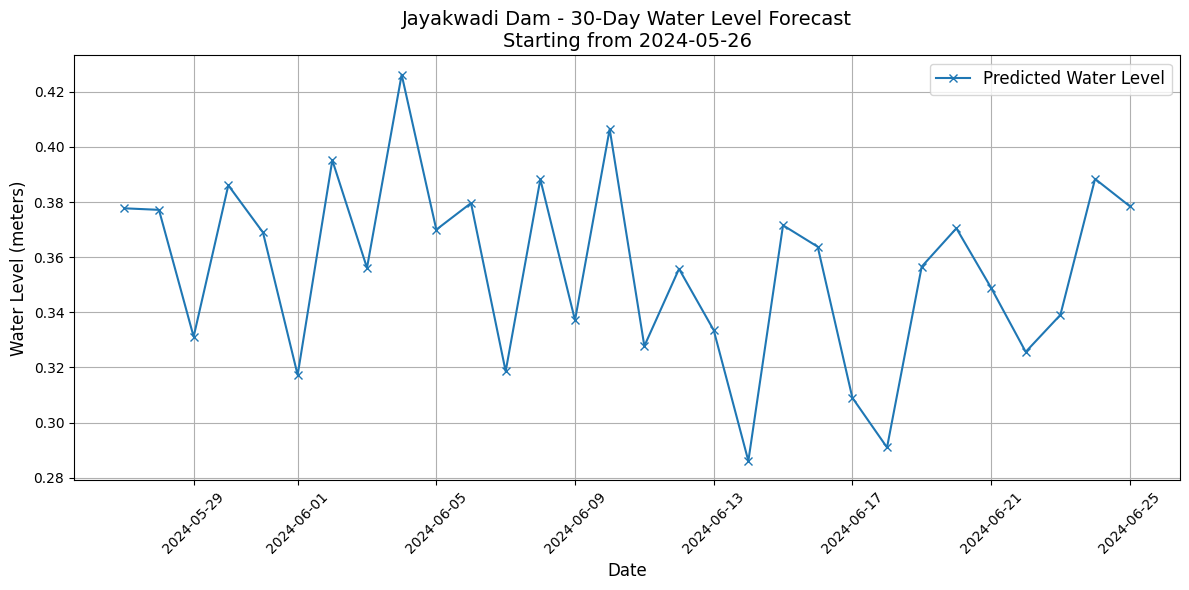

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

=== Forecast: Next 30-Day Water Level for Jayakwadi Dam ===
Day 1: 0.36399999260902405 meters
Day 2: 0.35899999737739563 meters
Day 3: 0.3240000009536743 meters
Day 4: 0.3790000081062317 meters
Day 5: 0.3490000069141388 meters
Day 6: 0.30000001192092896 meters
Day 7: 0.3799999952316284 meters
Day 8: 0.33799999952316284 meters
Day 9: 0.4180000126361847 meters
Day 10: 0.35899999737739563 meters
Day 11: 0.3619999885559082 meters
Day 12: 0.2939999997615814 meters
Day 13: 0.3720000088214874 meters
Day 14: 0.32100000977516174 meters
Day 15: 0.4009999930858612 meters
Day 16: 0.3089999854564667 meters
Day 17: 0.3409999907016754 meters
Day 18: 0.31200000643730164 meters
Day 19: 0.2680000066757202 meters
Day 20: 0.3529999852180481 meters
Day 21: 0.35199999809265137 meters
Day 22: 0.29499998688697815 meters
Day 23: 0.2709999978542328 meters
Day 24: 0.34700000286102295 meters
Day 25: 0.3580000102519989 meters
Day 26: 0.33899998664855957 meters
Day 27: 0.31299

In [ ]:
# BiLSTM Model for 30-Day Water Level Forecasting (Jayakwadi Dam)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- Configuration ---
CSV_PATH   = "/content/jayakwadi_model_input.csv"   # <<==== NEW FILE HERE
DAM_NAME   = "Jayakwadi Dam"
LOOK_BACK  = 30
HORIZON    = 30
TEST_RATIO = 0.2
EPOCHS     = 50
BATCH_SIZE = 32
LEARNING_RATE = 0.001
np.random.seed(42)
tf.random.set_seed(42)

# --- Load dataset ---
df = pd.read_csv(CSV_PATH, parse_dates=['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# (optional but safe) – remove any rows with missing values
features   = ['Rainfall_mm','Temperature_C','Humidity_%']  # no inflow/outflow
target_col = 'Water_Level_m'
df = df.dropna(subset=features + [target_col]).reset_index(drop=True)

# --- Scale the data ---
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_all = scaler_x.fit_transform(df[features].values)
y_all = scaler_y.fit_transform(df[[target_col]].values)

# --- Sequence generation (Supervised Learning) ---
X_seq, Y_seq = [], []
for i in range(0, len(df) - LOOK_BACK - HORIZON + 1):
    X_seq.append(X_all[i : i + LOOK_BACK, :])
    Y_seq.append(y_all[i + LOOK_BACK : i + LOOK_BACK + HORIZON, 0])
X_seq, Y_seq = np.array(X_seq), np.array(Y_seq)

# --- Train-test split ---
train_size = int((1 - TEST_RATIO) * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
Y_train, Y_test = Y_seq[:train_size], Y_seq[train_size:]
n_features = X_seq.shape[2]

# --- Build the BiLSTM model ---
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(LOOK_BACK, n_features)),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(HORIZON, activation='linear')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='mse',
    metrics=['mae']
)
model.summary()

# --- Callbacks ---
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
ckpt = ModelCheckpoint("jayakwadi_bilstm_30day.keras",  # <<==== different name
                       monitor='val_loss',
                       save_best_only=True,
                       verbose=1)

# --- Train the model ---
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es, ckpt],
    verbose=2
)

# --- Predict on test set ---
Y_pred_scaled = model.predict(X_test)

# --- Inverse scale predictions and actuals ---
def inv_scale_y(arr_scaled):
    return scaler_y.inverse_transform(arr_scaled.reshape(-1,1)).flatten()

rmse_list, mae_list = [], []
for h in range(HORIZON):
    y_true_h = inv_scale_y(Y_test[:, h])
    y_pred_h = inv_scale_y(Y_pred_scaled[:, h])
    rmse_list.append(math.sqrt(mean_squared_error(y_true_h, y_pred_h)))
    mae_list.append(mean_absolute_error(y_true_h, y_pred_h))

print("=== Model Evaluation ===")
print(f"Average RMSE over {HORIZON} days: {np.mean(rmse_list):.3f} meters")
print(f"Average MAE over {HORIZON} days : {np.mean(mae_list):.3f} meters")
print(f"First 5-day RMSE values  : {np.round(rmse_list[:5], 3)} meters")

# --- Plot sample prediction for last test window ---
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=HORIZON)

plt.figure(figsize=(12,6))
plt.plot(future_dates, inv_scale_y(Y_pred_scaled[-1]), marker='x', label='Predicted Water Level')

plt.title(f"{DAM_NAME} - {HORIZON}-Day Water Level Forecast\nStarting from {last_date.date()}", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Water Level (meters)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# --- Forecast next 30 days from latest data ---
last_X = X_all[-LOOK_BACK:, :].reshape(1, LOOK_BACK, n_features)
pred_30_scaled = model.predict(last_X)
pred_30 = inv_scale_y(pred_30_scaled.flatten())

print(f"\n=== Forecast: Next {HORIZON}-Day Water Level for {DAM_NAME} ===")
for i, val in enumerate(np.round(pred_30, 3), 1):
    print(f"Day {i}: {val} meters")

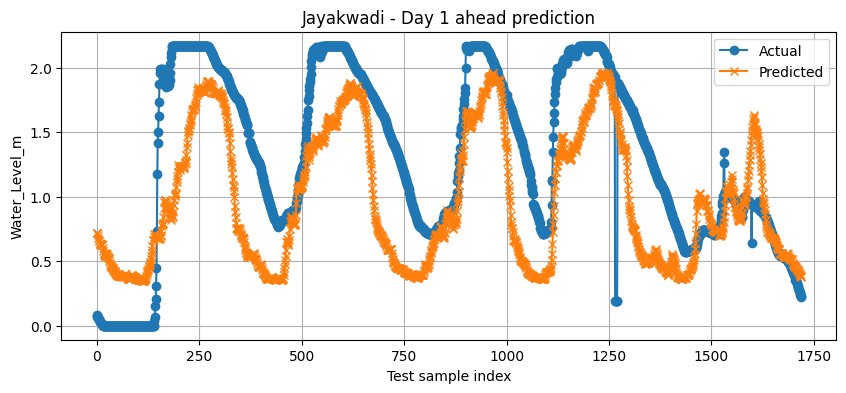

In [ ]:
# pick one test sample, e.g., the last one
h = 0  # horizon index, e.g., day 1 prediction

y_true_h = inv_scale_y(Y_test[:, h])
y_pred_h = inv_scale_y(Y_pred_scaled[:, h])

plt.figure(figsize=(10,4))
plt.plot(y_true_h, label='Actual', marker='o')
plt.plot(y_pred_h, label='Predicted', marker='x')
plt.title(f'Jayakwadi - Day {h+1} ahead prediction')
plt.xlabel('Test sample index')
plt.ylabel('Water_Level_m')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(df['Water_Level_m'].describe())


count    8658.000000
mean        0.874007
std         0.698795
min         0.000000
25%         0.247188
50%         0.732240
75%         1.414980
max         2.171000
Name: Water_Level_m, dtype: float64


In [ ]:
df['Water_Level_m'].describe()

,Water_Level_m
count,8658.000000
mean,0.874007
std,0.698795
min,0.000000
25%,0.247188
50%,0.732240
75%,1.414980
max,2.171000


In [ ]:
# ==== Model Definitions: LSTM, GRU, BiLSTM ====

def build_lstm(n_features, look_back, horizon):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(look_back, n_features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(horizon, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def build_gru(n_features, look_back, horizon):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=(look_back, n_features)),
        Dropout(0.2),
        GRU(64, return_sequences=False),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(horizon, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


def build_bilstm(n_features, look_back, horizon):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=(look_back, n_features)),
        Dropout(0.2),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(horizon, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [ ]:
# ===== FULL IMPORT BLOCK (FINAL) =====

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

print("All imports loaded.")


All imports loaded.


In [ ]:
# ==== Train and Compare Models ====

models = {
    "LSTM": build_lstm(n_features, LOOK_BACK, HORIZON),
    "GRU": build_gru(n_features, LOOK_BACK, HORIZON),
    "BiLSTM": build_bilstm(n_features, LOOK_BACK, HORIZON)
}

results_rmse = {}
results_mae = {}
predictions_scaled = {}

EPOCHS = 25
BATCH_SIZE = 32

def inv_y(arr):
    return scaler_y.inverse_transform(arr.reshape(-1,1)).flatten()

for name, model in models.items():
    print(f"\n===== Training {name} =====")

    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=2,
        callbacks=[es]
    )

    # Predictions
    Y_pred_s = model.predict(X_test)
    predictions_scaled[name] = Y_pred_s

    # Flatten comparison
    true = inv_y(Y_test.flatten())
    pred = inv_y(Y_pred_s.flatten())

    rmse = math.sqrt(mean_squared_error(true, pred))
    mae  = mean_absolute_error(true, pred)

    results_rmse[name] = rmse
    results_mae[name] = mae

    print(f"{name} RMSE: {rmse:.4f}")
    print(f"{name} MAE : {mae:.4f}")



===== Training LSTM =====
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 - 18s - 82ms/step - loss: 0.0751 - mae: 0.2284 - val_loss: 0.0791 - val_mae: 0.2404
Epoch 2/25
215/215 - 11s - 53ms/step - loss: 0.0642 - mae: 0.2164 - val_loss: 0.1178 - val_mae: 0.3005
Epoch 3/25
215/215 - 11s - 53ms/step - loss: 0.0626 - mae: 0.2139 - val_loss: 0.1181 - val_mae: 0.3028
Epoch 4/25
215/215 - 11s - 53ms/step - loss: 0.0615 - mae: 0.2120 - val_loss: 0.1157 - val_mae: 0.3005
Epoch 5/25
215/215 - 12s - 55ms/step - loss: 0.0609 - mae: 0.2110 - val_loss: 0.1101 - val_mae: 0.2947
Epoch 6/25
215/215 - 19s - 90ms/step - loss: 0.0600 - mae: 0.2093 - val_loss: 0.0965 - val_mae: 0.2744
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
LSTM RMSE: 0.6106
LSTM MAE : 0.5219

===== Training GRU =====
Epoch 1/25
215/215 - 16s - 75ms/step - loss: 0.0803 - mae: 0.2370 - val_loss: 0.1059 - val_mae: 0.2789
Epoch 2/25
215/215 - 20s - 93ms/step - loss: 0.0657 - mae: 0.2186 - val_loss: 0.1237 - val_mae: 0.3085
Epoch 3/25
215/215 - 20s - 95ms/step - loss: 0.0626 - mae: 0.2137 - val_loss: 0.1175 

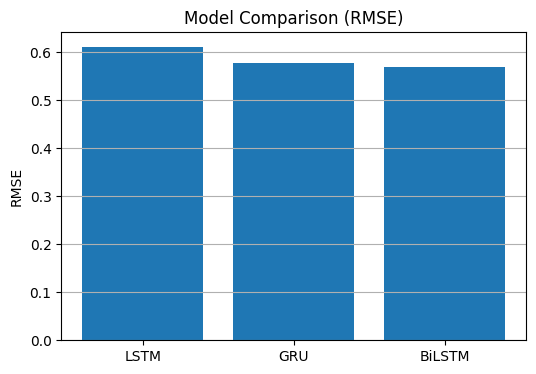

In [ ]:
# ==== Plot RMSE Comparison ====
plt.figure(figsize=(6,4))
plt.bar(results_rmse.keys(), results_rmse.values())
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.grid(axis='y')
plt.show()


In [ ]:
results_rmse


{'LSTM': 0.6106261536778423,
 'GRU': 0.5772767444418824,
 'BiLSTM': 0.5692673665992989}

In [ ]:
# Select the best model based on RMSE
best_model_name = min(results_rmse, key=results_rmse.get)
best_model = models[best_model_name]

print("Best model selected:", best_model_name)


Best model selected: BiLSTM


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


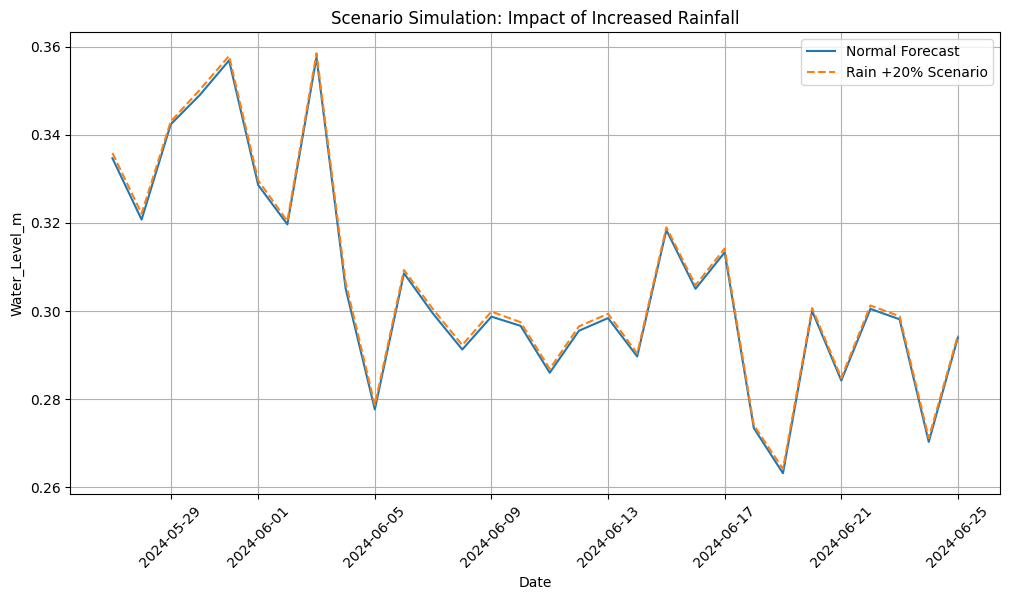

In [ ]:
# ==== Scenario Simulation: Rainfall +20% ====

# Base sequence = last 30 days
base_seq = X_all[-LOOK_BACK:, :].copy()

# Feature order = ['Rainfall_mm', 'Temperature_C', 'Humidity_%']
# Increase rainfall (index 0)
scenario_seq = base_seq.copy()
scenario_seq[:, 0] *= 1.20   # +20%

scenario_seq = scenario_seq.reshape(1, LOOK_BACK, n_features)
base_seq     = base_seq.reshape(1, LOOK_BACK, n_features)

# Predictions
pred_normal_s  = best_model.predict(base_seq)
pred_scenario_s = best_model.predict(scenario_seq)

pred_normal  = inv_y(pred_normal_s.flatten())
pred_scenario = inv_y(pred_scenario_s.flatten())

# Plot
future_dates = pd.date_range(start=df['Date'].iloc[-1]+pd.Timedelta(days=1),
                             periods=HORIZON)

plt.figure(figsize=(12,6))
plt.plot(future_dates, pred_normal, label="Normal Forecast")
plt.plot(future_dates, pred_scenario, '--', label="Rain +20% Scenario")
plt.title("Scenario Simulation: Impact of Increased Rainfall")
plt.xlabel("Date")
plt.ylabel("Water_Level_m")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def inv_y(arr):
    """Inverse scale a 1D numpy array of scaled target values."""
    return scaler_y.inverse_transform(arr.reshape(-1, 1)).flatten()


In [ ]:
# ==== Baseline error on test set (no permutation) ====

# Predict on normal X_test
Y_pred_scaled = best_model.predict(X_test)

y_true_all = inv_y(Y_test.flatten())
y_pred_all = inv_y(Y_pred_scaled.flatten())

baseline_rmse = math.sqrt(mean_squared_error(y_true_all, y_pred_all))
baseline_mae  = mean_absolute_error(y_true_all, y_pred_all)

print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Baseline MAE : {baseline_mae:.4f}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Baseline RMSE: 0.5693
Baseline MAE : 0.4951


In [ ]:
# ==== Permutation Feature Importance ====

np.random.seed(42)

feature_importance = {}

n_samples = X_test.shape[0]

for j, feat_name in enumerate(features):
    print(f"\nPermuting feature: {feat_name}")

    # Copy original test data
    X_perm = X_test.copy()

    # Create a permutation of sample indices
    perm_idx = np.random.permutation(n_samples)

    # For each test sample i, replace its entire time-series for feature j
    # with the series from another random sample (perm_idx[i])
    for i in range(n_samples):
        X_perm[i, :, j] = X_test[perm_idx[i], :, j]

    # Predict with permuted feature
    Y_pred_perm_scaled = best_model.predict(X_perm)

    y_pred_perm = inv_y(Y_pred_perm_scaled.flatten())

    rmse_perm = math.sqrt(mean_squared_error(y_true_all, y_pred_perm))

    # Importance = how much worse the model becomes when this feature is destroyed
    delta_rmse = rmse_perm - baseline_rmse
    feature_importance[feat_name] = delta_rmse

    print(f"RMSE after permuting {feat_name}: {rmse_perm:.4f}")
    print(f"Increase in RMSE (importance): {delta_rmse:.4f}")



Permuting feature: Rainfall_mm
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
RMSE after permuting Rainfall_mm: 0.6334
Increase in RMSE (importance): 0.0642

Permuting feature: Temperature_C
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
RMSE after permuting Temperature_C: 0.8617
Increase in RMSE (importance): 0.2924

Permuting feature: Humidity_%
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
RMSE after permuting Humidity_%: 0.7791
Increase in RMSE (importance): 0.2099


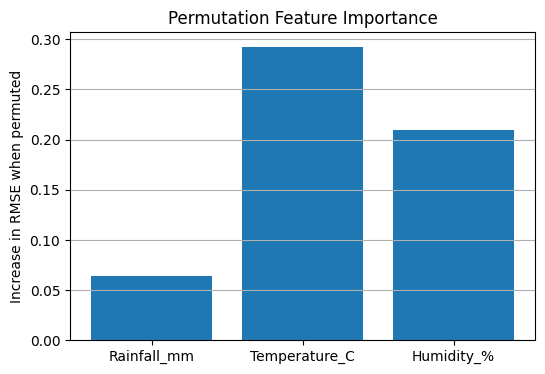

Permutation importances: {'Rainfall_mm': 0.06415230251731141, 'Temperature_C': 0.29240275644815195, 'Humidity_%': 0.2098680959503224}


In [ ]:
# ==== Plot permutation feature importance ====

plt.figure(figsize=(6,4))
names = list(feature_importance.keys())
values = list(feature_importance.values())

plt.bar(names, values)
plt.ylabel("Increase in RMSE when permuted")
plt.title("Permutation Feature Importance")
plt.grid(axis='y')
plt.show()

print("Permutation importances:", feature_importance)


In [ ]:
from google.colab import files
files.upload()


Saving jayakwadi_model_input (1).csv to jayakwadi_model_input (1).csv


{'jayakwadi_model_input (1).csv': b'Date,Dam_Name,Rainfall_mm,Temperature_C,Humidity_%,Inflow_m3s,Outflow_m3s,Water_Level_m\r\n01-01-2000,Jayakwadi,0,20.49,31.87,0,0,1.818\r\n02-01-2000,Jayakwadi,0,20.13,30.87,0,0,1.811\r\n03-01-2000,Jayakwadi,0,20.25,29.09,0,0,1.808\r\n04-01-2000,Jayakwadi,0,20.12,26.24,0,0,1.804\r\n05-01-2000,Jayakwadi,0,19.46,25.17,0,0,1.804\r\n06-01-2000,Jayakwadi,0,19.36,22.11,0,0,1.801\r\n07-01-2000,Jayakwadi,0,18.79,21.78,0,0,1.801\r\n08-01-2000,Jayakwadi,0,19.7,20.18,0,0,1.798\r\n09-01-2000,Jayakwadi,0,21.21,19.12,0,0,1.798\r\n10-01-2000,Jayakwadi,0,22.43,20.57,0,0,1.795\r\n11-01-2000,Jayakwadi,0,23.23,26.86,0,0,1.791\r\n12-01-2000,Jayakwadi,0,23.63,33.12,0,0,1.785\r\n13-01-2000,Jayakwadi,0,23.62,34.83,0,0,1.782\r\n14-01-2000,Jayakwadi,0,23.22,34,0,0,1.775\r\n15-01-2000,Jayakwadi,0,22.45,19.38,0,0,1.771\r\n16-01-2000,Jayakwadi,0,22.42,23.46,0,0,1.762\r\n17-01-2000,Jayakwadi,0,24.77,37.09,0,0,1.751\r\n18-01-2000,Jayakwadi,0,24.62,37.75,0,0,1.748\r\n19-01-2000,Ja

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# === Helper: build BiLSTM for a given horizon ===
def build_bilstm_model(n_features, look_back, horizon, lr=0.001):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=(look_back, n_features)),
        Dropout(0.2),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(horizon, activation='linear')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae']
    )
    return model

# === Helper: run full experiment for a given horizon ===
def run_bilstm_for_horizon(df, features, target_col, look_back, horizon, test_ratio=0.2,
                           epochs=30, batch_size=32, dam_name="Jayakwadi Dam"):
    print(f"\n========== Running BiLSTM for HORIZON = {horizon} days ==========")

    # Scale data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_all = scaler_x.fit_transform(df[features].values)
    y_all = scaler_y.fit_transform(df[[target_col]].values)

    # Create sequences
    X_seq, Y_seq = [], []
    for i in range(0, len(df) - look_back - horizon + 1):
        X_seq.append(X_all[i : i + look_back, :])
        Y_seq.append(y_all[i + look_back : i + look_back + horizon, 0])

    X_seq = np.array(X_seq)
    Y_seq = np.array(Y_seq)

    print("X_seq shape:", X_seq.shape)   # (samples, look_back, features)
    print("Y_seq shape:", Y_seq.shape)   # (samples, horizon)

    # Train-test split
    train_size = int((1 - test_ratio) * len(X_seq))
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    Y_train, Y_test = Y_seq[:train_size], Y_seq[train_size:]

    n_features = X_seq.shape[2]
    print("Train samples:", len(X_train), " Test samples:", len(X_test))

    # Build model
    model = build_bilstm_model(n_features, look_back, horizon)

    # Train
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[es],
        verbose=2
    )

    # Predict on test
    Y_pred_scaled = model.predict(X_test)

    # Inverse-scaling helper
    def inv_y(arr_scaled):
        return scaler_y.inverse_transform(arr_scaled.reshape(-1,1)).flatten()

    # RMSE/MAE per horizon day
    rmse_list, mae_list = [], []
    for h in range(horizon):
        y_true_h = inv_y(Y_test[:, h])
        y_pred_h = inv_y(Y_pred_scaled[:, h])
        rmse_list.append(math.sqrt(mean_squared_error(y_true_h, y_pred_h)))
        mae_list.append(mean_absolute_error(y_true_h, y_pred_h))

    print(f"\n=== Evaluation for {horizon}-day horizon ===")
    print(f"Average RMSE over {horizon} days: {np.mean(rmse_list):.3f}")
    print(f"Average MAE  over {horizon} days: {np.mean(mae_list):.3f}")
    print("First 5-day RMSE values:", np.round(rmse_list[:5], 3))

    # --- Plot 1: RMSE vs day ahead ---
    plt.figure(figsize=(10,4))
    plt.plot(range(1, horizon+1), rmse_list, marker='o')
    plt.title(f"{dam_name} - RMSE vs Forecast Day (H={horizon})")
    plt.xlabel("Forecast Day (ahead)")
    plt.ylabel("RMSE (Water_Level_m)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Forecast next 'horizon' days from latest real data ---
    last_X = X_all[-look_back:, :].reshape(1, look_back, n_features)
    pred_future_scaled = model.predict(last_X)
    pred_future = inv_y(pred_future_scaled.flatten())

    # Dates for future
    last_date = pd.to_datetime(df['Date'].iloc[-1])
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=horizon)


    # --- Plot 2: future forecast curve ---
    plt.figure(figsize=(12,5))
    plt.plot(future_dates, pred_future, marker='x')
    plt.title(f"{dam_name} - Next {horizon}-Day Water Level Forecast (BiLSTM)")
    plt.xlabel("Date")
    plt.ylabel("Water_Level_m")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        "model": model,
        "scaler_x": scaler_x,
        "scaler_y": scaler_y,
        "rmse_list": rmse_list,
        "mae_list": mae_list,
        "pred_future": pred_future,
        "future_dates": future_dates
    }


In [ ]:
import os
os.listdir("/content")


['.config', 'jayakwadi_model_input (1).csv', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv("jayakwadi_model_input (1).csv", parse_dates=["Date"])
df = df.sort_values("Date").reset_index(drop=True)
df = df.dropna().reset_index(drop=True)

print(df.head())


         Date   Dam_Name  Rainfall_mm  Temperature_C  Humidity_%  Inflow_m3s  \
0  01-01-2000  Jayakwadi         0.00          20.49       31.87           0   
1  01-01-2001  Jayakwadi         0.64          19.51       63.33           0   
2  01-01-2002  Jayakwadi         0.00          20.34       36.90           0   
3  01-01-2003  Jayakwadi         0.00          18.01       29.16           0   
4  01-01-2004  Jayakwadi         0.00          21.13       28.34           0   

   Outflow_m3s  Water_Level_m  
0            0          1.818  
1            0          0.849  
2            0          0.373  
3            0          0.222  
4            0          0.233  


In [ ]:
DAM_NAME = "Jayakwadi Dam"

features = ['Rainfall_mm','Temperature_C','Humidity_%']
target_col = 'Water_Level_m'

LOOK_BACK = 30
TEST_RATIO = 0.2
EPOCHS = 30
BATCH_SIZE = 32



========== Running BiLSTM for HORIZON = 30 days ==========
X_seq shape: (8599, 30, 3)
Y_seq shape: (8599, 30)
Train samples: 6879  Test samples: 1720
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 - 37s - 171ms/step - loss: 0.1018 - mae: 0.2670 - val_loss: 0.0829 - val_mae: 0.2505
Epoch 2/30
215/215 - 29s - 134ms/step - loss: 0.0814 - mae: 0.2501 - val_loss: 0.0820 - val_mae: 0.2490
Epoch 3/30
215/215 - 42s - 197ms/step - loss: 0.0795 - mae: 0.2462 - val_loss: 0.0771 - val_mae: 0.2399
Epoch 4/30
215/215 - 28s - 132ms/step - loss: 0.0677 - mae: 0.2183 - val_loss: 0.0688 - val_mae: 0.2182
Epoch 5/30
215/215 - 30s - 139ms/step - loss: 0.0609 - mae: 0.2031 - val_loss: 0.0642 - val_mae: 0.2071
Epoch 6/30
215/215 - 42s - 195ms/step - loss: 0.0570 - mae: 0.1945 - val_loss: 0.0627 - val_mae: 0.2018
Epoch 7/30
215/215 - 28s - 132ms/step - loss: 0.0533 - mae: 0.1870 - val_loss: 0.0610 - val_mae: 0.1971
Epoch 8/30
215/215 - 28s - 132ms/step - loss: 0.0502 - mae: 0.1809 - val_loss: 0.0564 - val_mae: 0.1897
Epoch 9/30
215/215 - 30s - 138ms/step - loss: 0.0478 - mae: 0.1758 - val_loss: 0.0563 - val_mae: 0.1904
Epoch 10/30
215/215 - 40s - 185ms/step - loss: 0.0453 - mae: 0.1707 - val_l

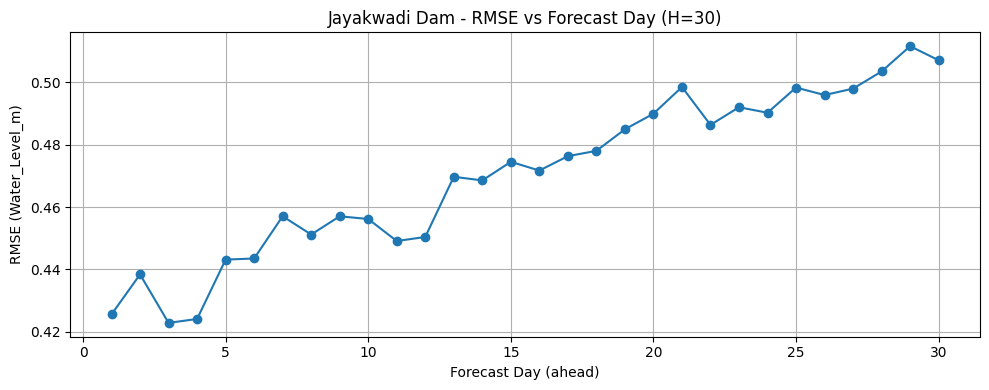

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/tmp/ipython-input-783390618.py:112: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  last_date = pd.to_datetime(df['Date'].iloc[-1])


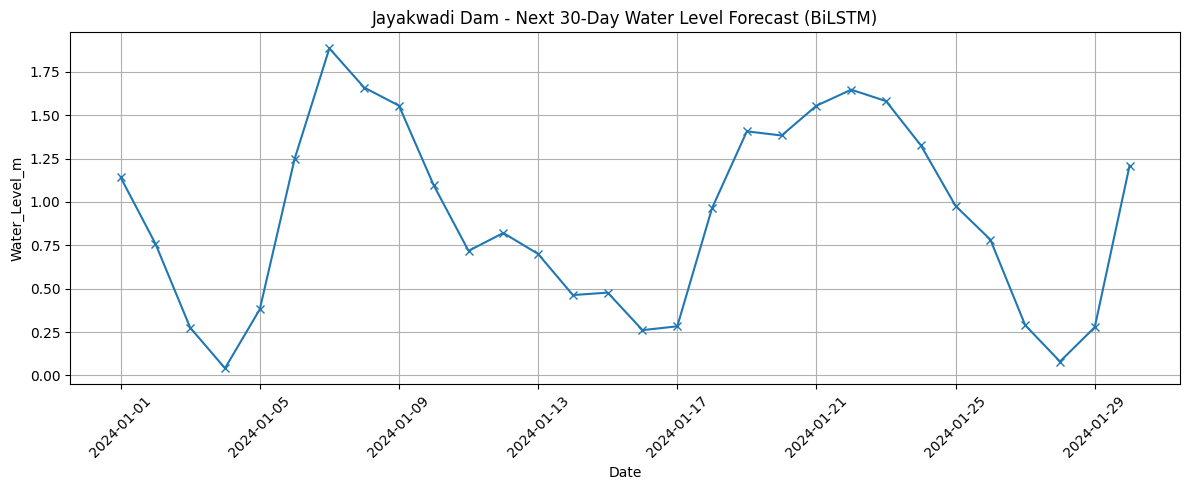


========== Running BiLSTM for HORIZON = 60 days ==========
X_seq shape: (8569, 30, 3)
Y_seq shape: (8569, 60)
Train samples: 6855  Test samples: 1714


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
215/215 - 37s - 173ms/step - loss: 0.0971 - mae: 0.2634 - val_loss: 0.0833 - val_mae: 0.2507
Epoch 2/30
215/215 - 40s - 188ms/step - loss: 0.0811 - mae: 0.2496 - val_loss: 0.0807 - val_mae: 0.2485
Epoch 3/30
215/215 - 32s - 148ms/step - loss: 0.0788 - mae: 0.2455 - val_loss: 0.0762 - val_mae: 0.2366
Epoch 4/30
215/215 - 29s - 135ms/step - loss: 0.0687 - mae: 0.2207 - val_loss: 0.0683 - val_mae: 0.2164
Epoch 5/30
215/215 - 40s - 187ms/step - loss: 0.0618 - mae: 0.2049 - val_loss: 0.0667 - val_mae: 0.2127
Epoch 6/30
215/215 - 42s - 196ms/step - loss: 0.0582 - mae: 0.1977 - val_loss: 0.0647 - val_mae: 0.2068
Epoch 7/30
215/215 - 29s - 136ms/step - loss: 0.0558 - mae: 0.1930 - val_loss: 0.0613 - val_mae: 0.2018
Epoch 8/30
215/215 - 41s - 190ms/step - loss: 0.0530 - mae: 0.1866 - val_loss: 0.0601 - val_mae: 0.1987
Epoch 9/30
215/215 - 29s - 136ms/step - loss: 0.0514 - mae: 0.1830 - val_loss: 0.0606 - val_mae: 0.1987
Epoch 10/30
215/215 - 31s - 144ms/step - loss: 0.0500 - mae: 0.1

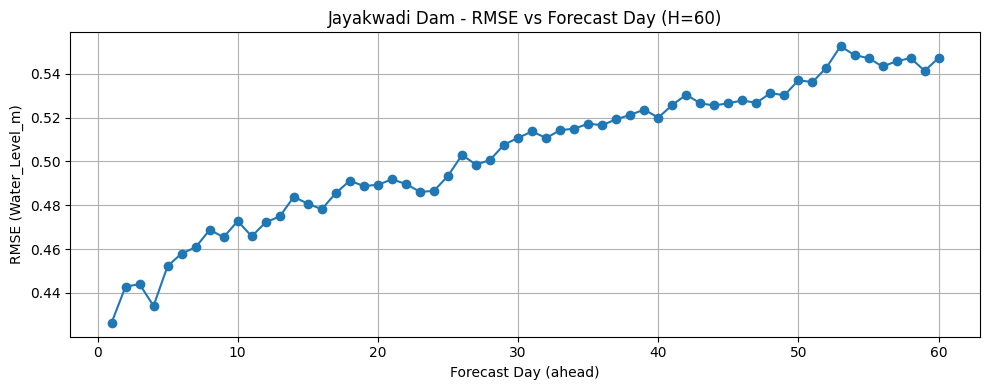

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/tmp/ipython-input-783390618.py:112: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  last_date = pd.to_datetime(df['Date'].iloc[-1])


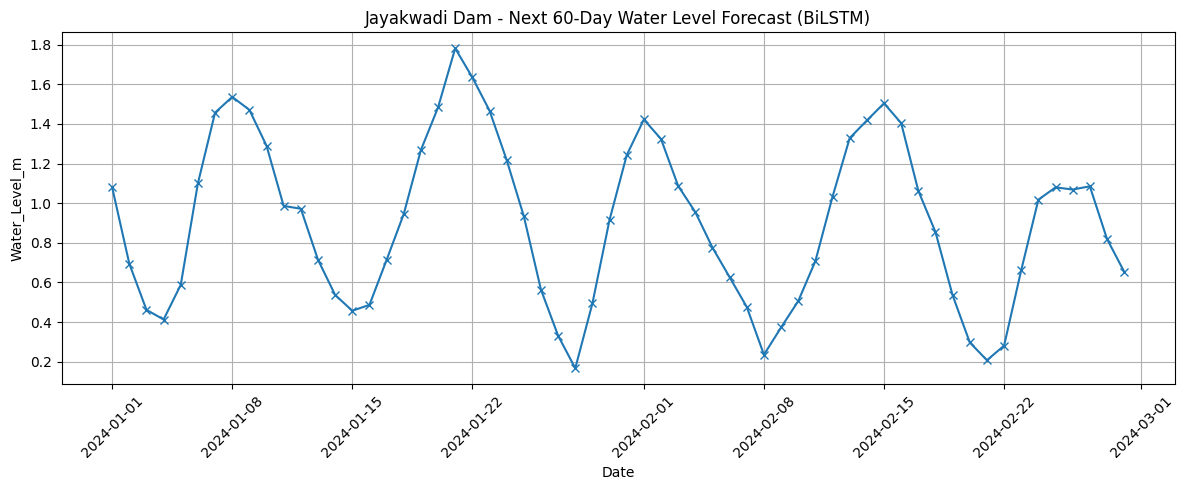


========== Running BiLSTM for HORIZON = 90 days ==========
X_seq shape: (8539, 30, 3)
Y_seq shape: (8539, 90)
Train samples: 6831  Test samples: 1708
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


214/214 - 36s - 169ms/step - loss: 0.1052 - mae: 0.2706 - val_loss: 0.0852 - val_mae: 0.2530
Epoch 2/30
214/214 - 41s - 194ms/step - loss: 0.0823 - mae: 0.2512 - val_loss: 0.0816 - val_mae: 0.2488
Epoch 3/30
214/214 - 28s - 131ms/step - loss: 0.0806 - mae: 0.2494 - val_loss: 0.0813 - val_mae: 0.2485
Epoch 4/30
214/214 - 29s - 134ms/step - loss: 0.0800 - mae: 0.2486 - val_loss: 0.0803 - val_mae: 0.2466
Epoch 5/30
214/214 - 40s - 188ms/step - loss: 0.0751 - mae: 0.2351 - val_loss: 0.0724 - val_mae: 0.2254
Epoch 6/30
214/214 - 28s - 133ms/step - loss: 0.0681 - mae: 0.2181 - val_loss: 0.0704 - val_mae: 0.2213
Epoch 7/30
214/214 - 29s - 137ms/step - loss: 0.0644 - mae: 0.2102 - val_loss: 0.0669 - val_mae: 0.2109
Epoch 8/30
214/214 - 40s - 186ms/step - loss: 0.0611 - mae: 0.2027 - val_loss: 0.0664 - val_mae: 0.2096
Epoch 9/30
214/214 - 28s - 131ms/step - loss: 0.0585 - mae: 0.1968 - val_loss: 0.0640 - val_mae: 0.2039
Epoch 10/30
214/214 - 28s - 131ms/step - loss: 0.0567 - mae: 0.1930 - val_l

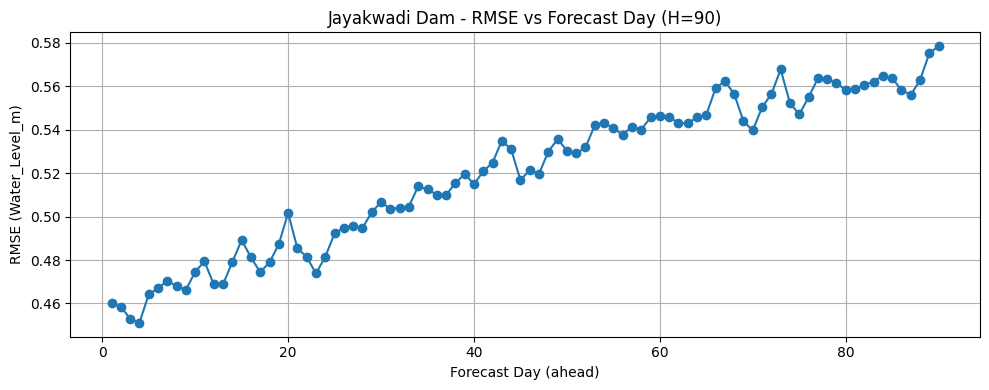

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/tmp/ipython-input-783390618.py:112: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  last_date = pd.to_datetime(df['Date'].iloc[-1])


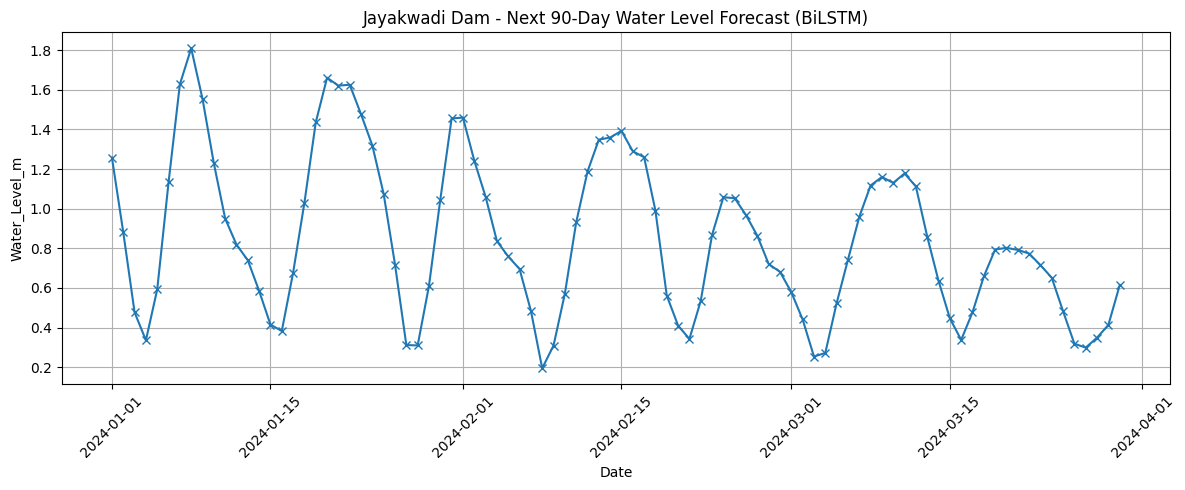

In [ ]:
HORIZONS = [30, 60, 90]
results_by_horizon = {}

for H in HORIZONS:
    res_H = run_bilstm_for_horizon(
        df=df,
        features=features,
        target_col=target_col,
        look_back=LOOK_BACK,
        horizon=H,
        test_ratio=TEST_RATIO,
        epochs=30,          # you can tune
        batch_size=BATCH_SIZE,
        dam_name=DAM_NAME
    )
    results_by_horizon[H] = res_H


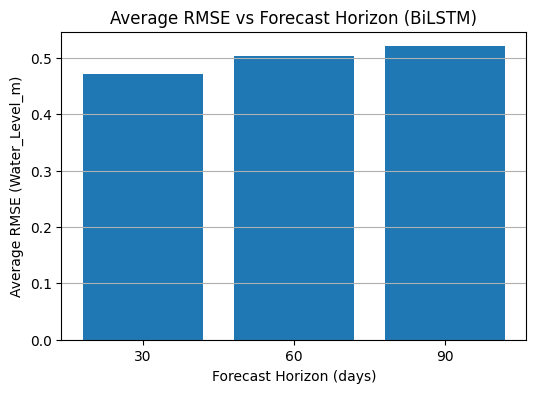

Average RMSE by horizon: {30: np.float64(0.47045694728182136), 60: np.float64(0.5036053076351054), 90: np.float64(0.5202380207270465)}


In [ ]:
avg_rmse_per_H = {H: np.mean(results_by_horizon[H]["rmse_list"]) for H in HORIZONS}

plt.figure(figsize=(6,4))
plt.bar([str(H) for H in HORIZONS], avg_rmse_per_H.values())
plt.xlabel("Forecast Horizon (days)")
plt.ylabel("Average RMSE (Water_Level_m)")
plt.title("Average RMSE vs Forecast Horizon (BiLSTM)")
plt.grid(axis='y')
plt.show()

print("Average RMSE by horizon:", avg_rmse_per_H)
